Projeto de transmissão de energia wireless
Eletromag

In [239]:
# imports
from capacitor import Capacitor
from indutor import Indutor
from utils import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Vamos definir os valores dos resistores, indutores e capacitores

In [240]:
r1 = 0.5 
r2 = 0.5
rc = 10
f = 3558
l1 = Indutor(indutancia=200e-5,frequencia=f)
l2 = Indutor(indutancia=200e-5,frequencia=f)
c1 = Capacitor(capacitancia=1e-6,frequencia=f)
c2 = Capacitor(capacitancia=1e-6,frequencia=f) 

k = 0.2

A seguir temos a imagem do circuito 

<img src="circuito.jpeg">

Vamos definir o valor de zeq, o pararelo entre Rc e C2

In [241]:
zeq = paralelo(rc,c2.reatancia())
print(f"Zeq = {zeq}")

Zeq = (9.52401664069681-2.1291485234004557j)


Calculando o valor da reatancia da indutancia mutua

In [242]:
Xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
print(f"xm = {Xm}")

xm = 8.942229329177989j


Calculando a frequencia de ressonancia

In [243]:
freqR = np.divide(np.sqrt(np.divide(1, np.multiply(l1.indutancia,c1.capacitancia))),np.multiply(2,np.pi))
print(f"freqR = {freqR} Hz")

freqR = 3558.812717085885 Hz


In [244]:
def CalcularTransformador(v1):
    Z=np.array([[r1+l1.reatancia() + c1.reatancia(), -Xm],[-Xm, l2.reatancia()+r2+zeq]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [245]:
i1,i2 = CalcularTransformador(v1=5)
print(f"i1 = {i1}")
print(f"i2 = {i2}")

i1 = (1.125158114029666+2.2037846280364586j)
i2 = (0.12065307046561158+0.4911976150567461j)


In [246]:
lisF = np.arange(1,freqR+10000,1)
lisI1 = []
lisI2 = []
lisPc = []
lisEfic = []
v1 = 5
for f in lisF:
    l1.frequencia = f
    l2.frequencia = f
    c1.frequencia = f
    c2.frequencia = f
    zeq = paralelo(rc,c2.reatancia())
    xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
    i1,i2 = CalcularTransformador(v1=v1)
    lisI1.append(abs(i1))
    lisI2.append(abs(i2))
    pc = (i2*zeq*i2.conjugate()/2).real
    lisPc.append(pc)
    pf = i1.conjugate()*v1/2
    lisEfic.append(pc.real/pf.real)

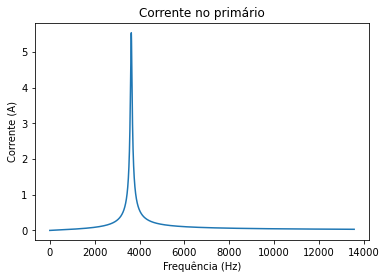

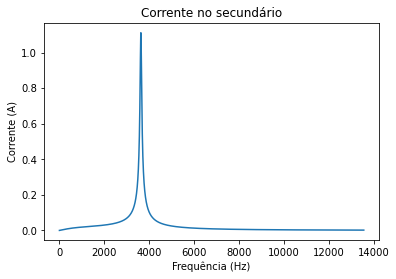

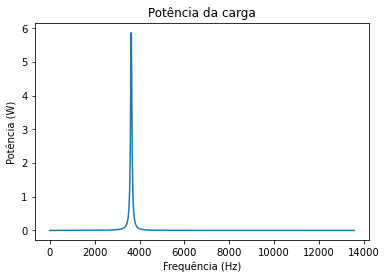

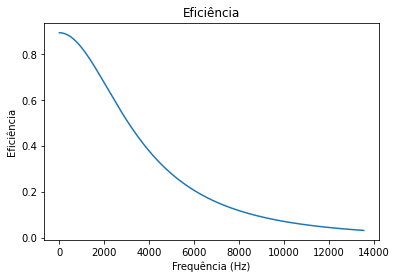

In [247]:
plt.plot(lisF,lisI1)
plt.title("Corrente no primário")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(lisF,lisI2)
plt.title("Corrente no secundário")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(lisF,lisPc)
plt.title("Potência da carga")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(lisF,lisEfic)
plt.title("Eficiência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.show()

Fixando a frequência no valor da frequencia de ressonancia

In [259]:
f = freqR
l1.frequencia = f
l2.frequencia = f
c1.frequencia = f
c2.frequencia = f
lisVp = []
lisK = np.arange(0,1,1e-6)
for k in lisK:
    Xm = k*np.sqrt(np.multiply(l1.reatancia(),l2.reatancia()))
    zeq = paralelo(rc,c2.reatancia())
    i1,i2 = CalcularTransformador(v1=v1)
    vc = (i2*zeq*i2.conjugate()/2).real
    lisVp.append(vc)
    

PLotando o gráfico do Vp em função do valor de K

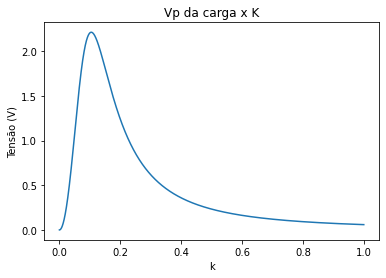

In [263]:
plt.plot(lisK,lisVp)
plt.title("Vp da carga x K")
plt.xlabel("k")
plt.ylabel("Tensão (V)")
plt.show()

In [270]:
print(f'Vmax = {np.max(lisVp)} V')

Vmax = 2.2136361387804104 V


In [271]:
for i in range(len(lisVp)):
    if lisVp[i] == 2.2136361387804104:
        print(f'k otimo = {lisK[i]}')
        break

k otimo = 0.104589


In [272]:
aux = 1/np.sqrt(l1.indutancia*c1.capacitancia)
print(f"aux = {aux}")

aux = 22360.679774997898
